Preprocessing:
Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis. (1 mark)

Analysis Tasks:
1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks)
2. Segregate employees based on their positions within the company. (2 marks)
3. Identify the predominant age group among employees. (2 marks)
4. Discover which team and position have the highest salary expenditure. (2 marks)
5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)

Graphical Representation:
For each of the five analysis tasks, create appropriate visualizations to present your findings effectively. (5x2 = 10 marks)

Data Story:
Provide insights gained from the analysis, highlighting key trends, patterns, and correlations within the dataset.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('myexcel.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
df['Height']=[random.randint(150,180) for i in range (len(df))]
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,176,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,160,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,164,231,NaN,5000000.0


In [5]:
df['College'] = df['College'].fillna("NA")
df['Salary'] = df['Salary'].fillna(0)

In [6]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,176,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,160,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,164,231,NA,5000000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int64  
 6   Weight    458 non-null    int64  
 7   College   458 non-null    object 
 8   Salary    458 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 32.3+ KB


In [8]:
team_distribution = df['Team'].value_counts(normalize=True) * 100
print(team_distribution)

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

In [18]:
position_groups = df.groupby('Position')

In [9]:
position_distribution = df['Position'].value_counts()
print(position_distribution)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


In [28]:
age_counts = df['Age'].value_counts()
print(age_counts)

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64


In [10]:
ages = [18, 25, 35, 45, 55, 65]
age_groups = pd.cut(df['Age'], bins=ages)
predominant_age_group = age_groups.value_counts().idxmax()
print(predominant_age_group)

(25, 35]


In [11]:
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()
print(team_salary)
print(position_salary)

Team
Atlanta Hawks              72902950.0
Boston Celtics             58541068.0
Brooklyn Nets              52528475.0
Charlotte Hornets          78340920.0
Chicago Bulls              86783378.0
Cleveland Cavaliers       106988689.0
Dallas Mavericks           71198732.0
Denver Nuggets             60121930.0
Detroit Pistons            67168263.0
Golden State Warriors      88868997.0
Houston Rockets            75283021.0
Indiana Pacers             66751826.0
Los Angeles Clippers       94854640.0
Los Angeles Lakers         71770431.0
Memphis Grizzlies          76550880.0
Miami Heat                 82515673.0
Milwaukee Bucks            69603517.0
Minnesota Timberwolves     59709697.0
New Orleans Pelicans       82750774.0
New York Knicks            73303898.0
Oklahoma City Thunder      93765298.0
Orlando Magic              60161470.0
Philadelphia 76ers         30992894.0
Phoenix Suns               63445135.0
Portland Trail Blazers     48301818.0
Sacramento Kings           71683666.0
San Ant

In [12]:
correlation = df[['Age', 'Salary']].corr()
print(correlation)

            Age   Salary
Age     1.00000  0.20501
Salary  0.20501  1.00000


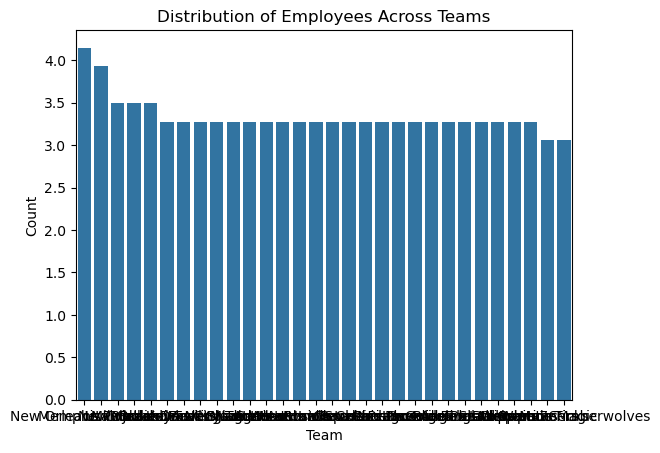

In [22]:
sns.barplot(x=team_distribution.index, y=team_distribution.values)
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

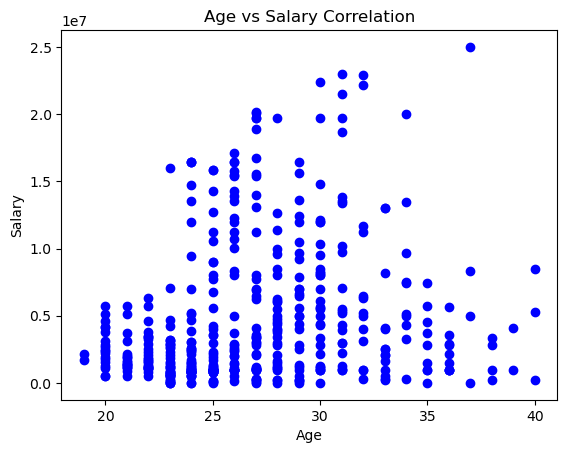

In [33]:
plt.scatter(df['Age'], df['Salary'], color='blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary Correlation')
plt.show()

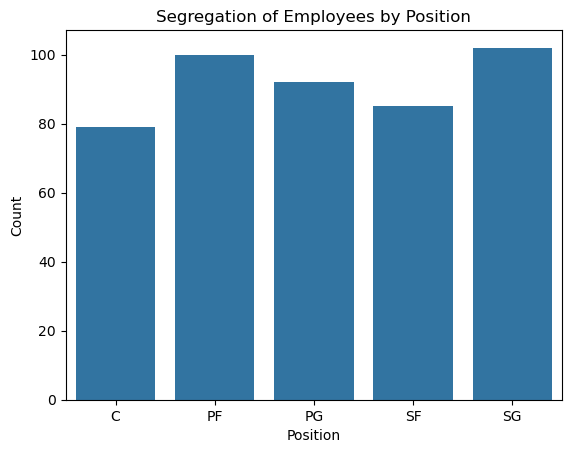

In [19]:
sns.barplot(x=position_groups.size().index, y=position_groups.size().values)
plt.title('Segregation of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

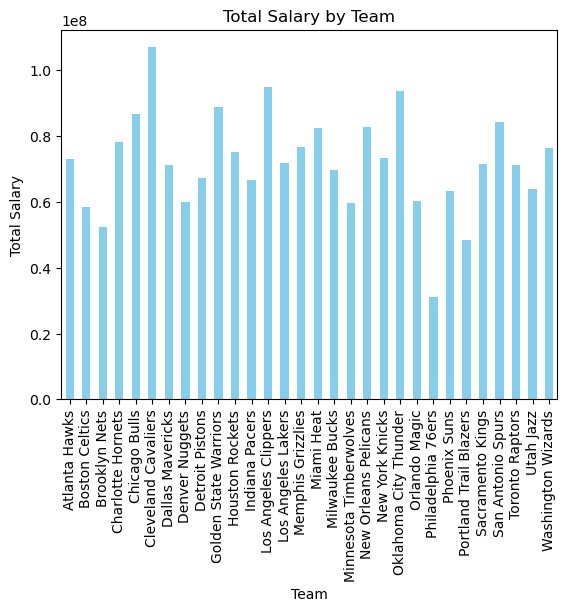

In [20]:
team_salary.plot(kind='bar', color='skyblue')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.title('Total Salary by Team')
plt.show()


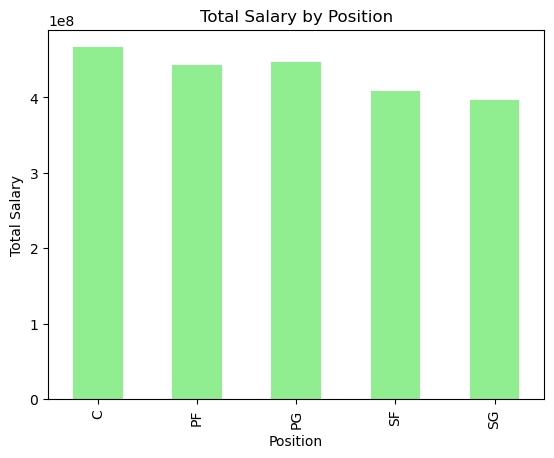

In [21]:
position_salary.plot(kind='bar', color='lightgreen')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.title('Total Salary by Position')
plt.show()

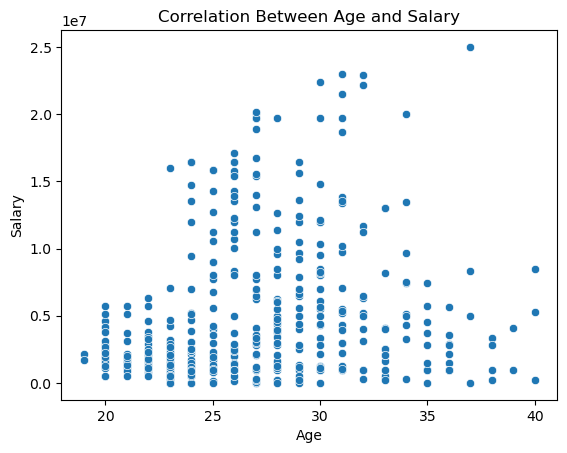

In [26]:
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

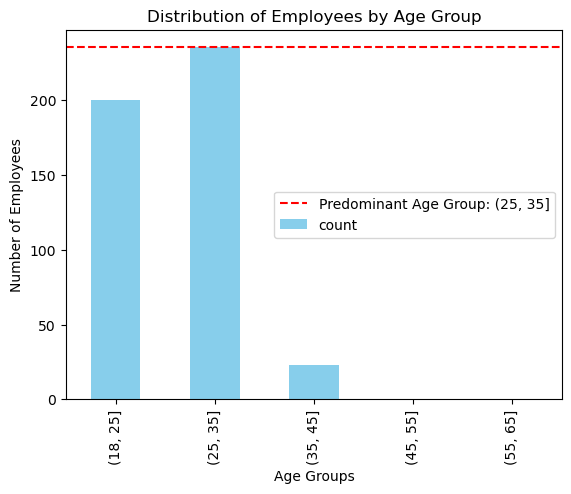

In [23]:
age_group_counts = age_groups.value_counts(sort=False)
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Age Group')
plt.axhline(y=age_group_counts.max(), color='red', linestyle='--', label=f'Predominant Age Group: {predominant_age_group}')
plt.legend()
plt.show()


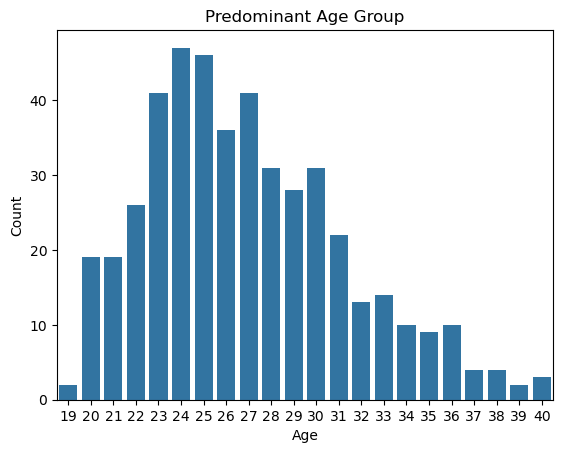

In [29]:
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Predominant Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SG'),
  Text(1, 0, 'PF'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'SF'),
  Text(4, 0, 'C')])

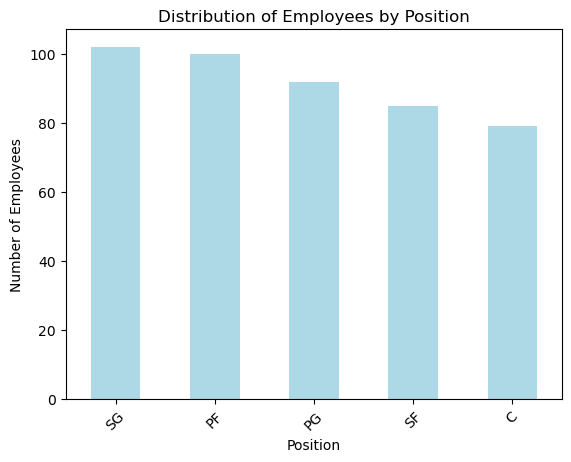

In [24]:
position_distribution.plot(kind='bar', color='lightblue')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Position')
plt.xticks(rotation=45)

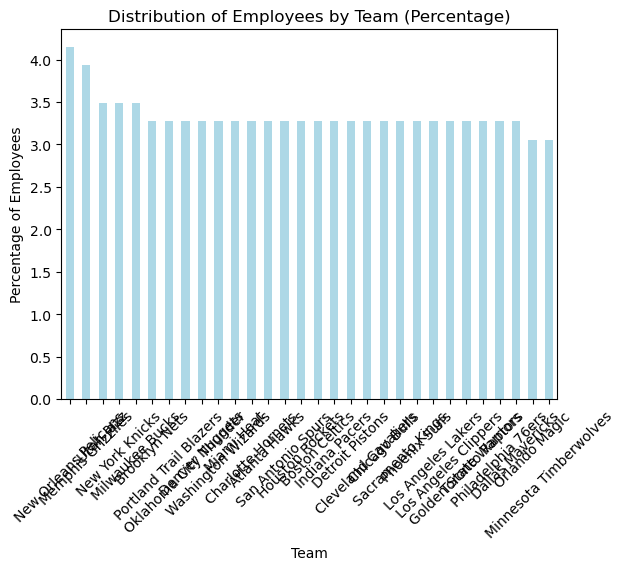

In [25]:
import matplotlib.pyplot as plt
team_distribution.plot(kind='bar', color='lightblue')
plt.xlabel('Team')
plt.ylabel('Percentage of Employees')
plt.title('Distribution of Employees by Team (Percentage)')
plt.xticks(rotation=45)
plt.show()